# Generalized control input remapping

In [1]:
from bagpy import bagreader
import numpy
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load bag

## LOADERS

In [6]:
def load_bag_file(bag_path):
    try:
        # Create a bagreader object
        bag = bagreader(bag_path)
        print(f"Bag file loaded successfully: {bag_path}")
        return bag
    except FileNotFoundError:
        print(f"Error: File not found at {bag_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

def list_and_extract_topics(bag_path):
    try:
        # Load the bag file
        bag = bagreader(bag_path)
        
        # List all available topics
        topics = bag.topics
        print(f"Topics available in the bag file: {topics}")
        
        # Dictionary to store extracted CSV file paths for each topic
        csv_files = {}
        
        # Extract each topic's data to CSV
        for topic in topics:
            print(f"Extracting topic: {topic}")
            csv_file = bag.message_by_topic(topic)
            csv_files[topic] = csv_file
            print(f"Data for topic '{topic}' saved to: {csv_file}")
    except FileNotFoundError:
        print(f"Error: File not found at {bag_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
        
    return csv_files

## UTILS

In [16]:
def count_zeros_as_percentage(df):
    """
    Counts the percentage of zero values for each column in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: A summary DataFrame showing the percentage of zeros for each column.
    """
    # Calculate the percentage of zeros for each column
    zero_percentages = (df == 0).sum() / len(df) * 100

    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Column': zero_percentages.index,
        'Zero_Percentage': zero_percentages.values
    }).sort_values(by='Zero_Percentage', ascending=False)

    # Formatting the percentage for readability
    summary['Zero_Percentage'] = summary['Zero_Percentage'].map("{:.2f}%".format)

    return summary

def plot_zero_percentage_histogram(df):
    """
    Plots a histogram of the percentage of zeros for each keypoint with labeled bars.
    Assumes input DataFrame has columns: 'index', 'keypoint', and 'percentage'.

    Parameters:
        df (DataFrame): DataFrame containing the keypoints and their zero percentages.
    """
    # Extract the necessary columns
    keypoints = df['Column']
    zero_percentages = df['Zero_Percentage'].apply(lambda x: float(x.strip('%')))  # Convert percentage to numeric
    
    # Create the histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(keypoints, zero_percentages, color='skyblue', edgecolor='black')

    # Add labels above bars
    for bar, percentage in zip(bars, zero_percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.1f}%', 
                ha='center', fontsize=9)

    # Set plot title and labels
    ax.set_title('Percentage of Zeros for Each Keypoint', fontsize=16)
    ax.set_xlabel('Keypoints', fontsize=12)
    ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
    ax.set_xticks(range(len(keypoints)))
    ax.set_xticklabels(keypoints, rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



## PLOTTERS

In [8]:
def plot_upper_body(df):
    """
    Plots the upper body points (right and left) on subplots with 2 columns.

    Parameters:
        df (DataFrame): The input DataFrame containing the body point data.
    """
    # Define the upper body points
    upper_body_points = ['shoulder', 'elbow', 'wrist']

    # Create subplots (2 columns, calculate rows dynamically)
    n_rows = len(upper_body_points) // 2 + len(upper_body_points) % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axes = axes.flatten()

    for idx, point in enumerate(upper_body_points):
        # Get the x and y columns for right and left
        r_x = f"r_{point}.x"
        r_y = f"r_{point}.y"
        l_x = f"l_{point}.x"
        l_y = f"l_{point}.y"

        # Plot on the current subplot
        ax = axes[idx]
        ax.scatter(df[r_y], df[r_x], label=f"Right {point}", color='blue', marker='o')
        ax.scatter(df[l_y], df[l_x], label=f"Left {point}", color='red', marker='x')

        # Add labels and title
        ax.set_title(f"{point.capitalize()} Positions")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for ax in axes[len(upper_body_points):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

def plot_upper_body_with_custom_axes(df, x_min=0, x_max=244, y_min=0, y_max=244):
    """
    Plots the upper body points (right and left) on subplots with 2 columns.
    The plot uses a coordinate system where (0, 0) is the upper-left corner,
    with X increasing to the right and Y increasing downward.

    Parameters:
        df (DataFrame): The input DataFrame containing the body point data.
        x_min, x_max (int): Limits for the X-axis.
        y_min, y_max (int): Limits for the Y-axis.
    """
    # Define the upper body points
    upper_body_points = ['shoulder', 'elbow', 'wrist']

    # Create subplots (2 columns, calculate rows dynamically)
    n_rows = len(upper_body_points) // 2 + len(upper_body_points) % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axes = axes.flatten()

    for idx, point in enumerate(upper_body_points):
        # Get the x and y columns for right and left
        r_x = f"r_{point}.x"
        r_y = f"r_{point}.y"
        l_x = f"l_{point}.x"
        l_y = f"l_{point}.y"

        # Plot on the current subplot
        ax = axes[idx]
        ax.scatter(df[r_x], df[r_y], label=f"Right {point}", color='blue', marker='o')
        ax.scatter(df[l_x], df[l_y], label=f"Left {point}", color='red', marker='x')

        # Set custom axis limits and invert Y-axis
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_max, y_min)  # Invert Y-axis (0,0 is upper-left corner)

        # Add labels and title
        ax.set_title(f"{point.capitalize()} Positions")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for ax in axes[len(upper_body_points):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

def plot_shoulder_elbow_wrist_over_time(df):
    """
    Plots the .x and .y coordinates of shoulder, elbow, and wrist over time
    in a 1x3 subplot layout.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.
    """
    # Define the body parts to plot
    body_parts = ['shoulder', 'elbow', 'wrist']

    # Create a 1x3 subplot layout
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))

    for i, part in enumerate(body_parts):
        ax = axes[i]

        # Plot .x and .y values for right and left side
        ax.plot(df['Time'], df[f'r_{part}.x'], label=f'Right {part} .x', color='blue', linestyle='-', marker='o')
        ax.plot(df['Time'], df[f'r_{part}.y'], label=f'Right {part} .y', color='blue', linestyle='--', marker='x')
        ax.plot(df['Time'], df[f'l_{part}.x'], label=f'Left {part} .x', color='red', linestyle='-', marker='o')
        ax.plot(df['Time'], df[f'l_{part}.y'], label=f'Left {part} .y', color='red', linestyle='--', marker='x')

        # Set title, labels, and grid
        ax.set_title(f'{part.capitalize()} Positions Over Time')
        ax.set_xlabel('Time')
        ax.set_ylabel('Coordinate Value')
        ax.grid(True)
        ax.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [21]:
# Load bag
bag = load_bag_file("./selected_topics.bag")

# Load csv files
csv_files = list_and_extract_topics("./selected_topics.bag")

# Select just part of the topics
topcs_interest = ['/hand_2d', '/hpe_2d', '/pose1', '/pose2', '/vect1', '/vect2']
dataframes_ = {}
# TODO: Depends on the bag name
for element in topcs_interest:
    print(element)
    df_ = pd.read_csv(f"./selected_topics{element}.csv")
    dataframes_[f'{element}'] = df_

[INFO]  Data folder ./selected_topics already exists. Not creating.
Bag file loaded successfully: ./selected_topics.bag
[INFO]  Data folder ./selected_topics already exists. Not creating.
Topics available in the bag file: dict_keys(['/hand_2d', '/hh_img', '/hpe_2d', '/pose1', '/pose2', '/rectify_color/parameter_descriptions', '/rectify_color/parameter_updates', '/rosout', '/rosout_agg', '/tf', '/tf_static', '/vect1', '/vect2'])
Extracting topic: /hand_2d
Data for topic '/hand_2d' saved to: ./selected_topics/hand_2d.csv
Extracting topic: /hh_img
Data for topic '/hh_img' saved to: ./selected_topics/hh_img.csv
Extracting topic: /hpe_2d
Data for topic '/hpe_2d' saved to: ./selected_topics/hpe_2d.csv
Extracting topic: /pose1
Data for topic '/pose1' saved to: ./selected_topics/pose1.csv
Extracting topic: /pose2
Data for topic '/pose2' saved to: ./selected_topics/pose2.csv
Extracting topic: /rectify_color/parameter_descriptions
Data for topic '/rectify_color/parameter_descriptions' saved to: 

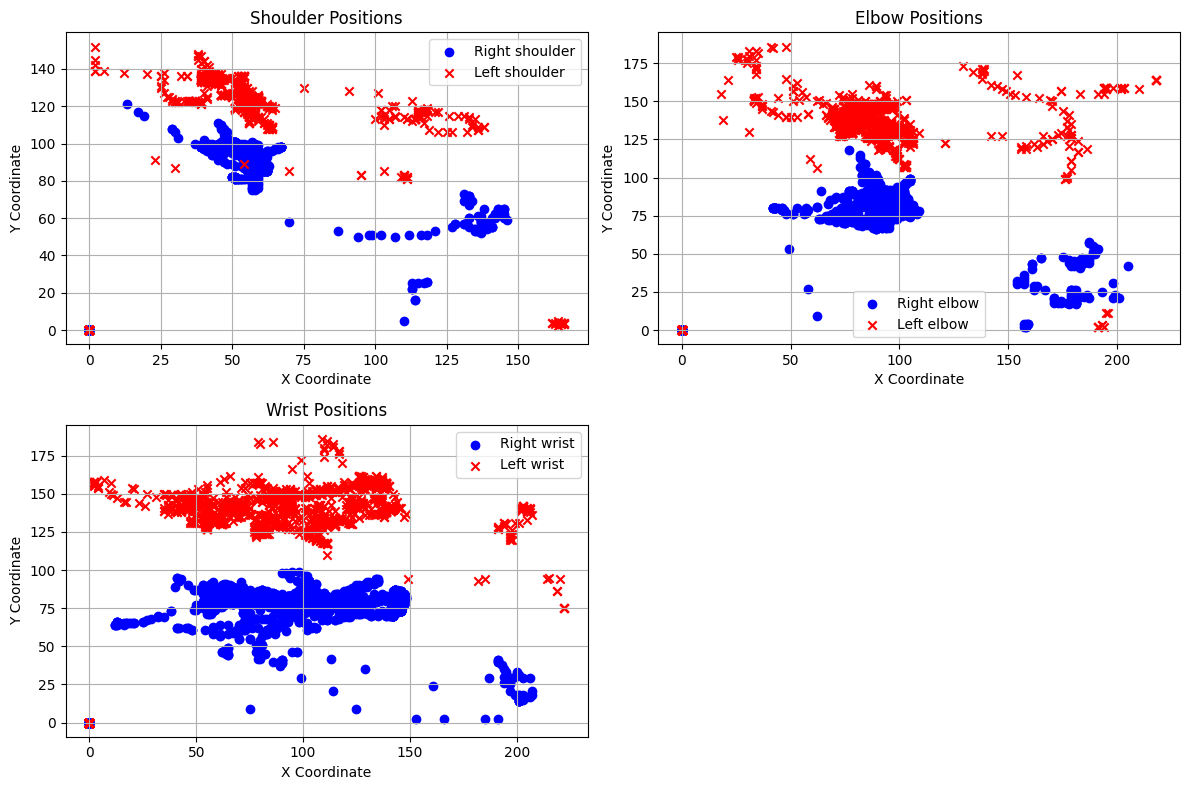

In [10]:
plot_upper_body(dataframes_['/hpe_2d'])

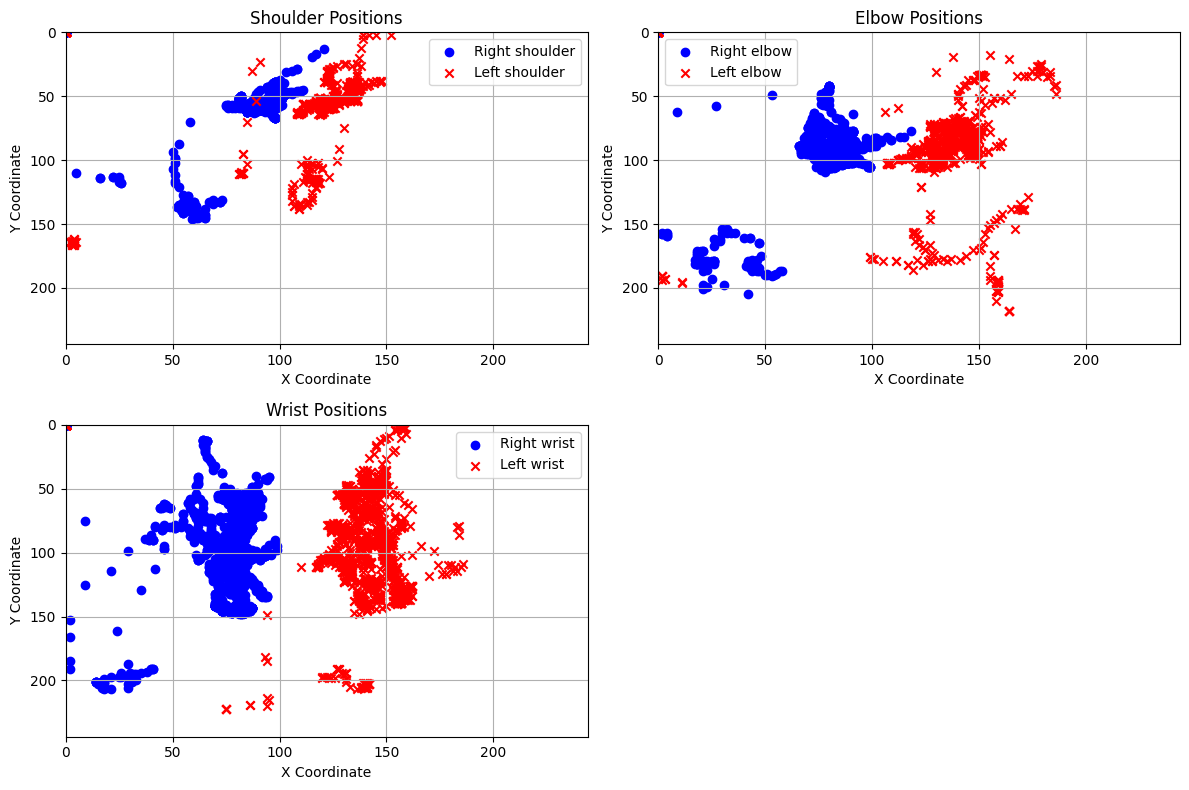

In [12]:
# This seems more correct but nevertheless, not perfect
plot_upper_body_with_custom_axes(dataframes_['/hpe_2d'])

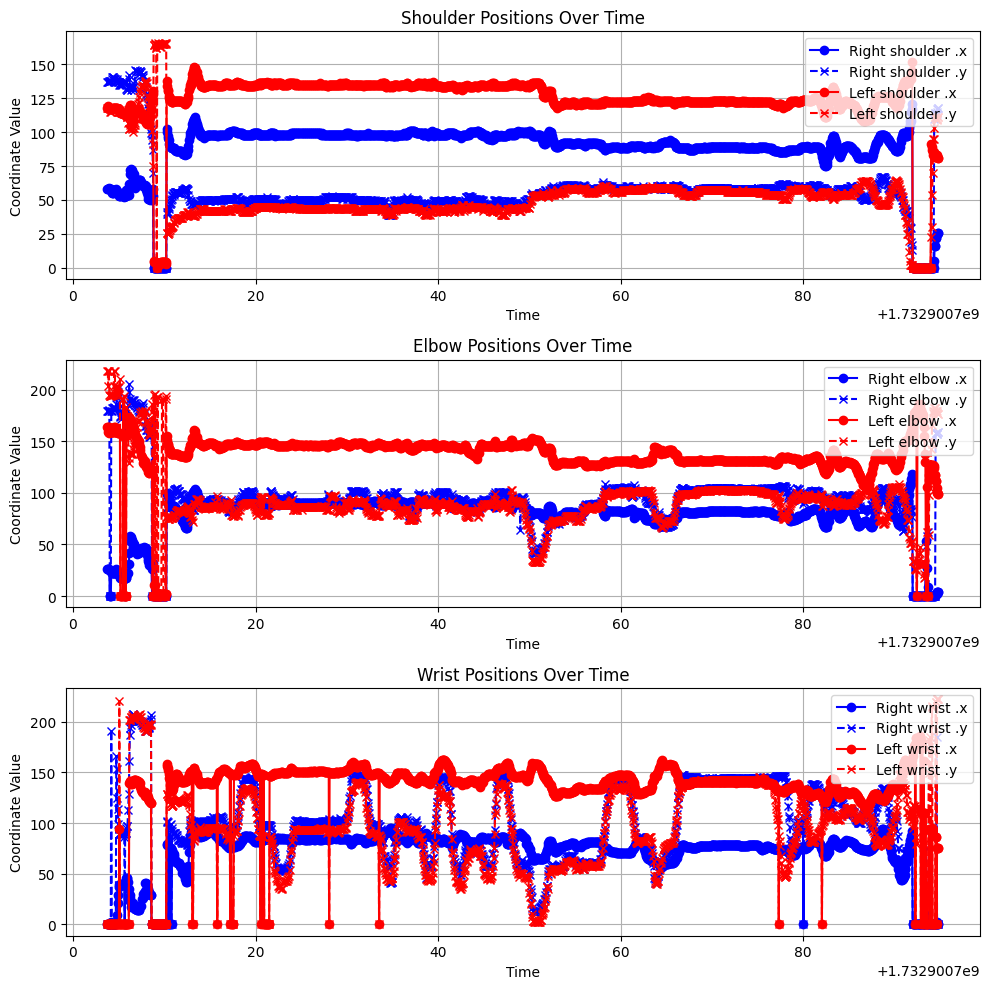

In [13]:
plot_shoulder_elbow_wrist_over_time(dataframes_['/hpe_2d'])

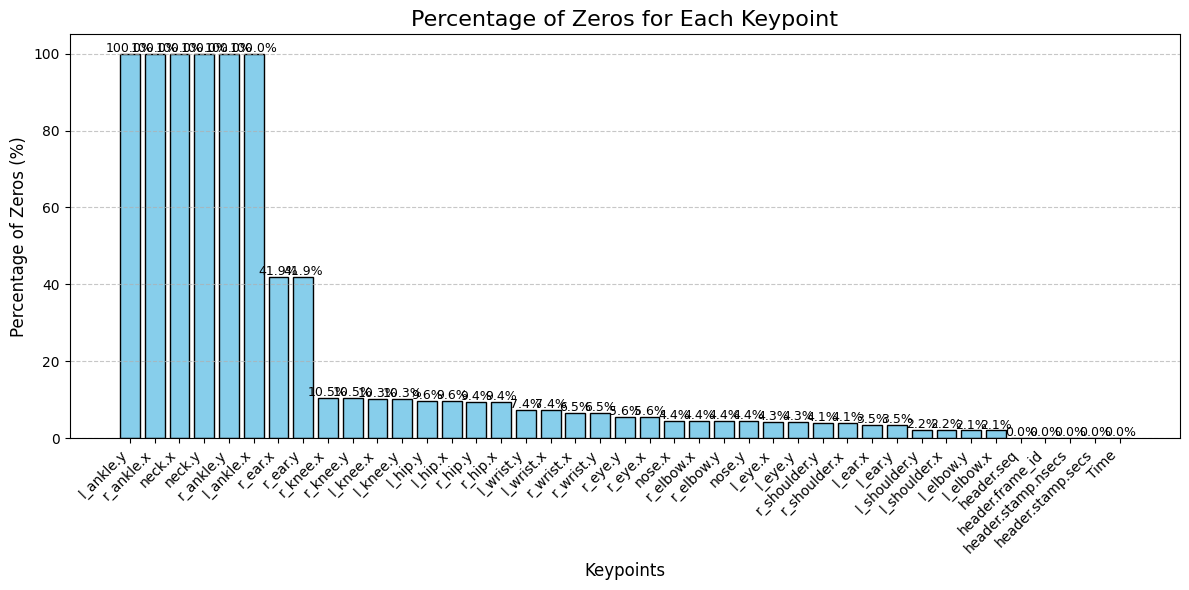

In [18]:
sum_ = count_zeros_as_percentage(dataframes_['/hpe_2d'])
plot_zero_percentage_histogram(sum_)

In [44]:
def plot_vector3_time_series(df):
    """
    Plots the x, y, and z components of a vector as a time series.
    The DataFrame should have 'time', 'x', 'y', and 'z' columns.

    Parameters:
        df (DataFrame): DataFrame containing the 'time', 'x', 'y', and 'z' components for the vector.
    """
    # Ensure the 'time' column is in datetime format for proper plotting
    df['Time'] = pd.to_datetime(df['Time'])

    # Create a 1x3 subplot layout
    fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Plot x component over time
    axes[0].plot(df['Time'], df['x'], color='blue', label='x')
    axes[0].set_title('X Component Over Time')
    axes[0].set_ylabel('X Value')
    axes[0].legend()

    # Plot y component over time
    axes[1].plot(df['Time'], df['y'], color='green', label='y')
    axes[1].set_title('Y Component Over Time')
    axes[1].set_ylabel('Y Value')
    axes[1].legend()

    # Plot z component over time
    axes[2].plot(df['Time'], df['z'], color='red', label='z')
    axes[2].set_title('Z Component Over Time')
    axes[2].set_ylabel('Z Value')
    axes[2].legend()

    # Set common labels for x-axis
    axes[2].set_xlabel('Time')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

In [27]:
v1 = dataframes_['/vect1']
v2 = dataframes_['/vect2']

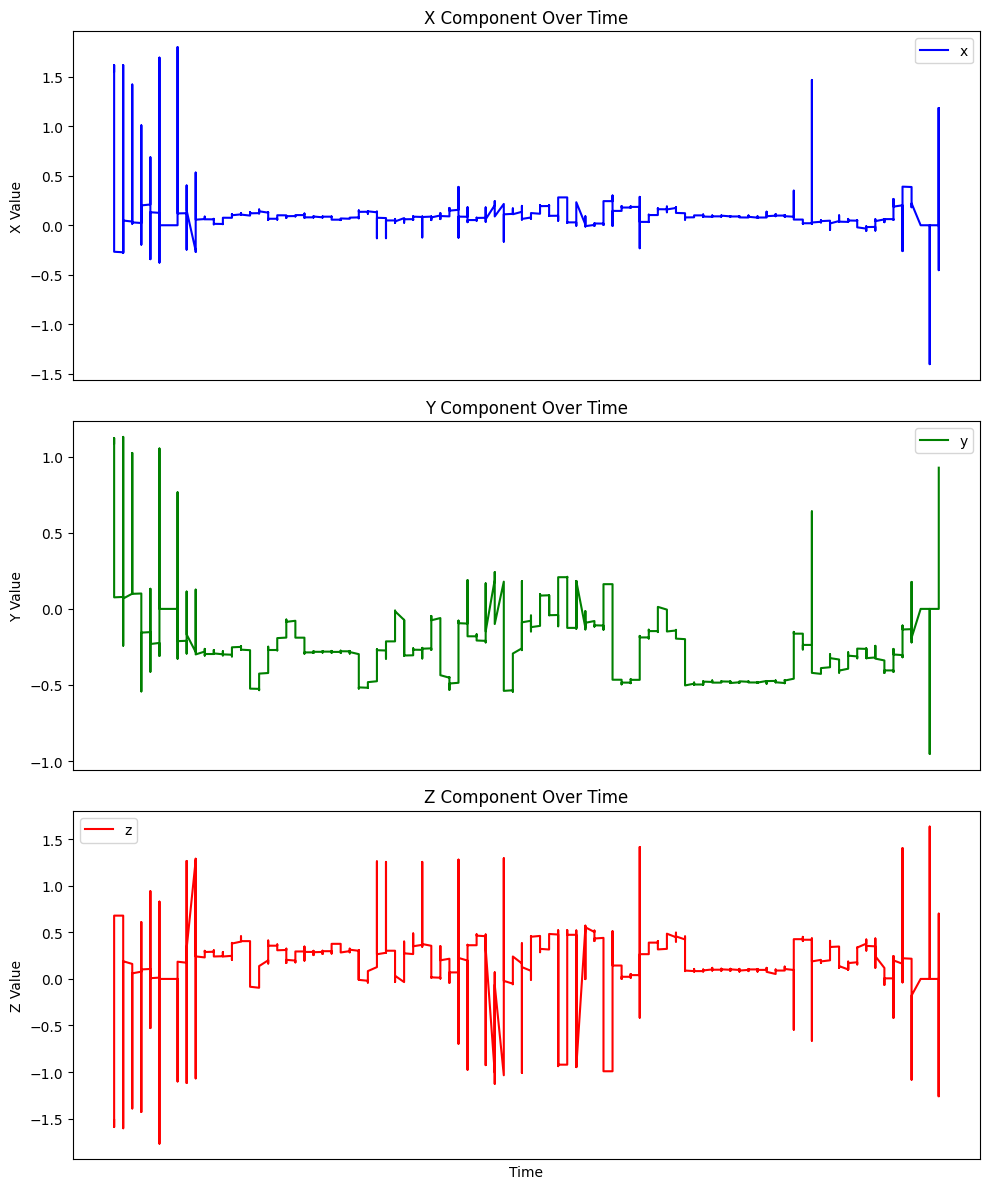

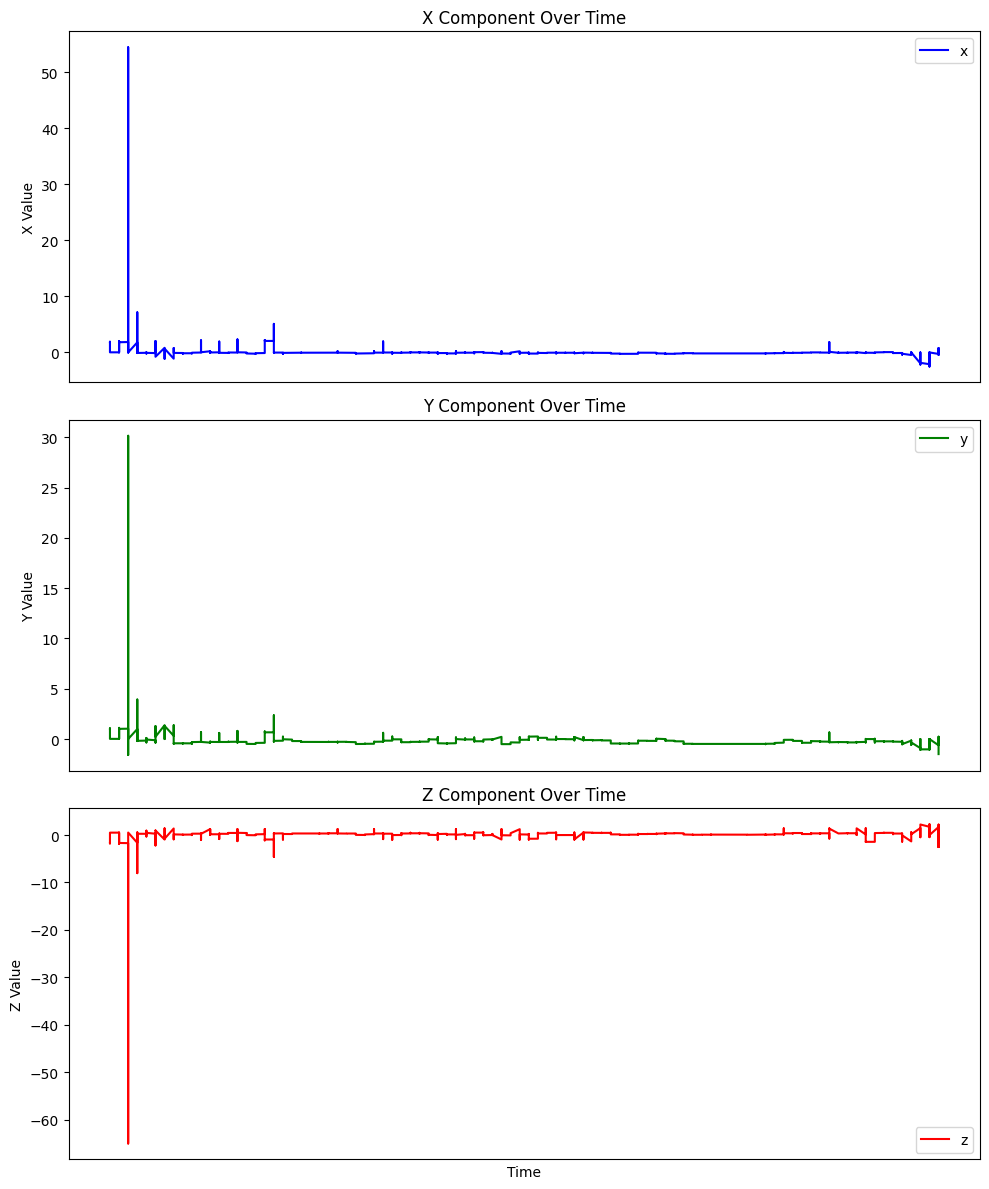

In [33]:
# Plot the time series for the vector components
plot_vector3_time_series(v1)
plot_vector3_time_series(v2)

In [40]:
def plot_pose_time_series(df):
    """
    Plots the position (x, y, z) and orientation (x, y, z, w) of a pose over time.
    The DataFrame should have columns for 'time', 'pose.position.x', 'pose.position.y',
    'pose.position.z', 'pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w'.
    
    Parameters:
        df (DataFrame): DataFrame containing pose data.
    """
    # Ensure the 'time' column is in datetime format for proper plotting
    df['time'] = pd.to_datetime(df['Time'])  # Assuming 'Time' is in seconds since epoch
    
    # Create a 2x3 subplot layout (2 rows, 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)

    # Plot position (x, y, z) over time
    axes[0, 0].plot(df['time'], df['pose.position.x'], color='blue', label='Position X')
    axes[0, 0].set_title('Position X Over Time')
    axes[0, 0].set_ylabel('X Value')
    axes[0, 0].legend()

    axes[0, 1].plot(df['time'], df['pose.position.y'], color='green', label='Position Y')
    axes[0, 1].set_title('Position Y Over Time')
    axes[0, 1].set_ylabel('Y Value')
    axes[0, 1].legend()

    axes[0, 2].plot(df['time'], df['pose.position.z'], color='red', label='Position Z')
    axes[0, 2].set_title('Position Z Over Time')
    axes[0, 2].set_ylabel('Z Value')
    axes[0, 2].legend()

    # Plot orientation (x, y, z, w) over time
    axes[1, 0].plot(df['time'], df['pose.orientation.x'], color='blue', label='Orientation X')
    axes[1, 0].set_title('Orientation X Over Time')
    axes[1, 0].set_ylabel('X Value')
    axes[1, 0].legend()

    axes[1, 1].plot(df['time'], df['pose.orientation.y'], color='green', label='Orientation Y')
    axes[1, 1].set_title('Orientation Y Over Time')
    axes[1, 1].set_ylabel('Y Value')
    axes[1, 1].legend()

    axes[1, 2].plot(df['time'], df['pose.orientation.z'], color='red', label='Orientation Z')
    axes[1, 2].set_title('Orientation Z Over Time')
    axes[1, 2].set_ylabel('Z Value')
    axes[1, 2].legend()

    # Set common labels for x-axis
    axes[1, 2].set_xlabel('Time')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


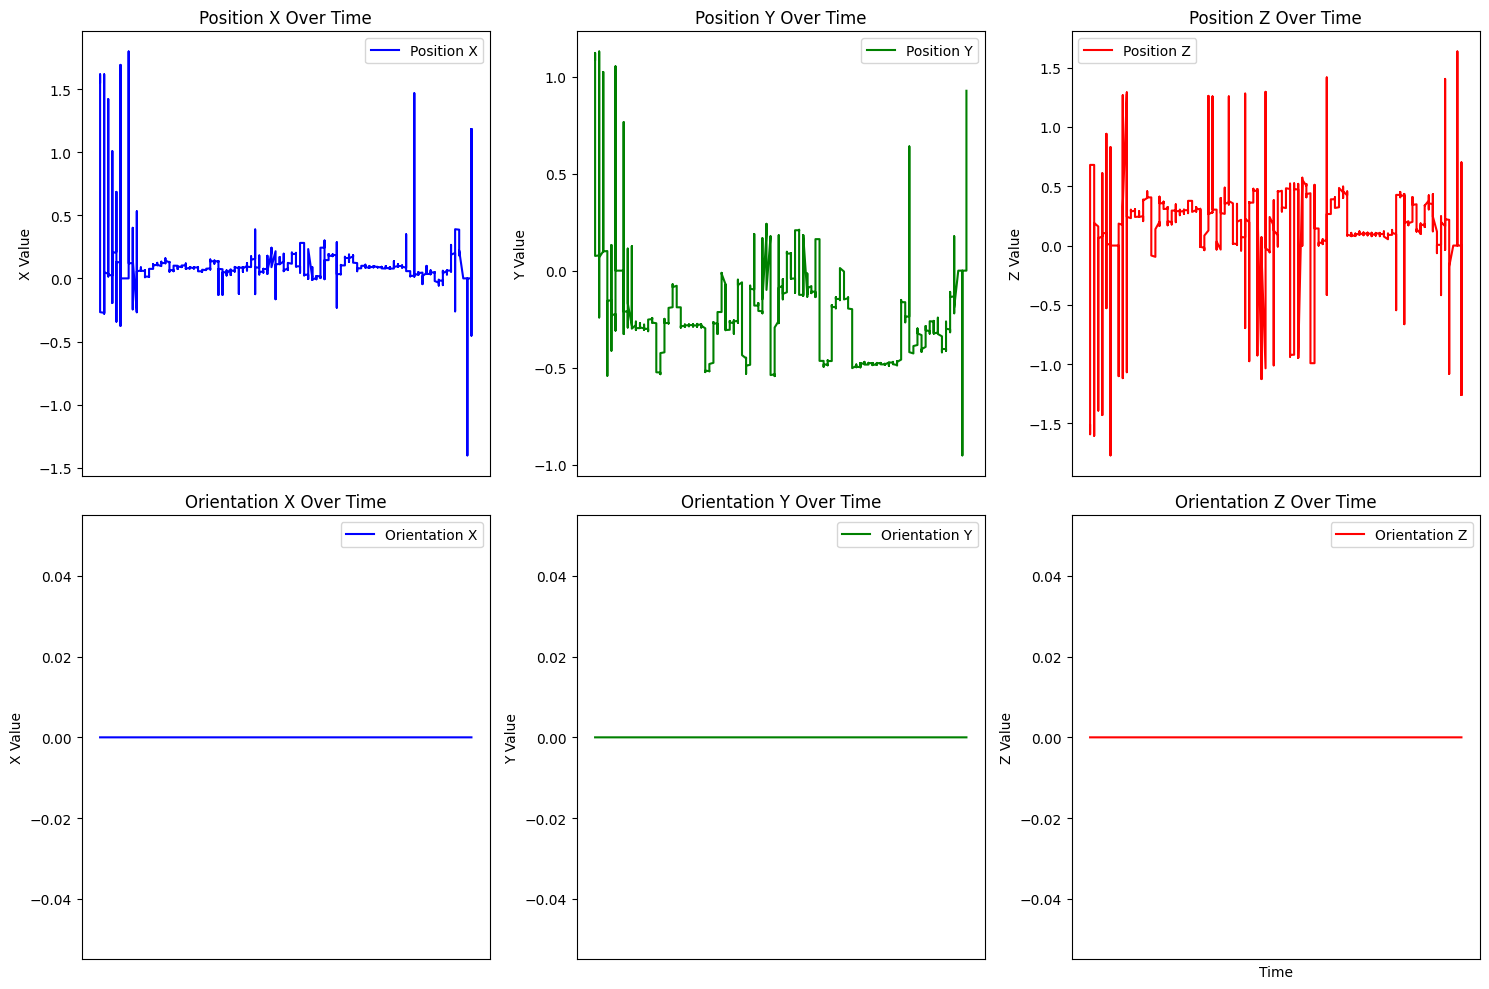

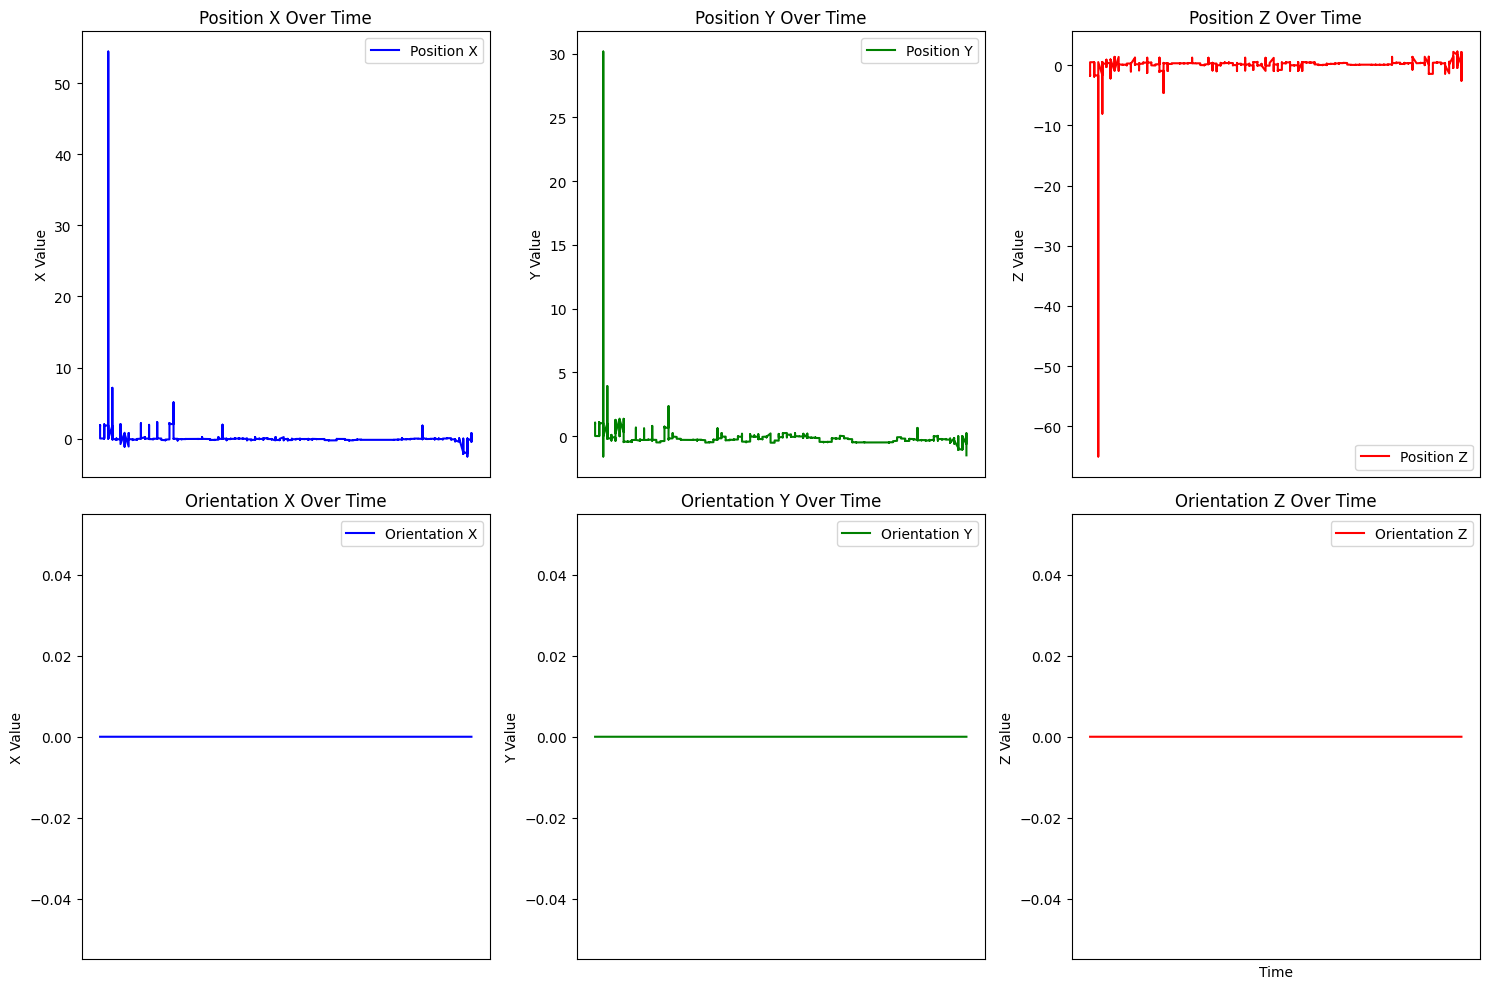

In [43]:
# Orientation is kept same, not that good
plot_pose_time_series(dataframes_['/pose1'])
plot_pose_time_series(dataframes_['/pose2'])

## HPE 3D test

Test HPE 3D to see how many outliers are there. 

In [49]:
# Load bag
bag_name = '3D_data_test'
bag = load_bag_file(f"./{bag_name}.bag")

# Load csv files
csv_files = list_and_extract_topics("./3D_data_test.bag")

# Select just part of the topics
topcs_interest = ['/hand_2d', '/hpe_2d', 'hpe_3d', '/pose1', '/pose2', '/vect1', '/vect2']
dataframes_ = {}
# TODO: Depends on the bag name
for element in topcs_interest:
    print(element)
    df_ = pd.read_csv(f"./{bag_name}/{element}.csv")
    dataframes_[f'{element}'] = df_

[INFO]  Data folder ./3D_data_test already exists. Not creating.
Bag file loaded successfully: ./3D_data_test.bag
[INFO]  Data folder ./3D_data_test already exists. Not creating.
Topics available in the bag file: dict_keys(['/hand_2d', '/hpe_2d', '/hpe_3d', '/pose1', '/pose2', '/tf', '/tf_static', '/vect1', '/vect2'])
Extracting topic: /hand_2d
Data for topic '/hand_2d' saved to: ./3D_data_test/hand_2d.csv
Extracting topic: /hpe_2d
Data for topic '/hpe_2d' saved to: ./3D_data_test/hpe_2d.csv
Extracting topic: /hpe_3d
Data for topic '/hpe_3d' saved to: ./3D_data_test/hpe_3d.csv
Extracting topic: /pose1
Data for topic '/pose1' saved to: ./3D_data_test/pose1.csv
Extracting topic: /pose2
Data for topic '/pose2' saved to: ./3D_data_test/pose2.csv
Extracting topic: /tf
Data for topic '/tf' saved to: ./3D_data_test/tf.csv
Extracting topic: /tf_static
Data for topic '/tf_static' saved to: ./3D_data_test/tf_static.csv
Extracting topic: /vect1
Data for topic '/vect1' saved to: ./3D_data_test/vec

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_keypoints_in_space(df, n_start, n_end):
    # Normalize the time column to scale from 0 to max time
    time_normalized = (df['Time'][n_start:n_end] - df['Time'][n_start]) / (df['Time'][n_end] - df['Time'][n_start])

    # Create a 3x2 subplot layout (3 rows, 2 columns), share x-axis for each column
    fig, axes = plt.subplots(3, 2, figsize=(12, 15), sharex='col')
    fig.suptitle('Keypoints Over Time', fontsize=16)

    # Colors for shoulder, wrist, elbow
    color_shoulder = 'red'    # Shoulder - red
    color_wrist = 'green'     # Wrist - green
    color_elbow = 'blue'      # Elbow - blue

    # Plot for r_shoulder, r_wrist, r_elbow x components (first row, first column)
    axes[0, 0].plot(time_normalized, df['r_shoulder.x'][n_start:n_end], label='r_shoulder.x', color=color_shoulder)
    axes[0, 0].plot(time_normalized, df['r_wrist.x'][n_start:n_end], label='r_wrist.x', color=color_wrist)
    axes[0, 0].plot(time_normalized, df['r_elbow.x'][n_start:n_end], label='r_elbow.x', color=color_elbow)
    axes[0, 0].set_title('Right Shoulder, Wrist, Elbow [x]')
    axes[0, 0].set_ylabel('x Value')
    axes[0, 0].grid(True)
    axes[0, 0].legend()

    # Plot for l_shoulder, l_wrist, l_elbow x components (first row, second column)
    axes[0, 1].plot(time_normalized, df['l_shoulder.x'][n_start:n_end], label='l_shoulder.x', color=color_shoulder)
    axes[0, 1].plot(time_normalized, df['l_wrist.x'][n_start:n_end], label='l_wrist.x', color=color_wrist)
    axes[0, 1].plot(time_normalized, df['l_elbow.x'][n_start:n_end], label='l_elbow.x', color=color_elbow)
    axes[0, 1].set_title('Left Shoulder, Wrist, Elbow [x]')
    axes[0, 1].set_ylabel('x Value')
    axes[0, 1].grid(True)
    axes[0, 1].legend()

    # Plot for r_shoulder, r_wrist, r_elbow y components (second row, first column)
    axes[1, 0].plot(time_normalized, df['r_shoulder.y'][n_start:n_end], label='r_shoulder.y', color=color_shoulder)
    axes[1, 0].plot(time_normalized, df['r_wrist.y'][n_start:n_end], label='r_wrist.y', color=color_wrist)
    axes[1, 0].plot(time_normalized, df['r_elbow.y'][n_start:n_end], label='r_elbow.y', color=color_elbow)
    axes[1, 0].set_title('Right Shoulder, Wrist, Elbow [y]')
    axes[1, 0].set_ylabel('y Value')
    axes[1, 0].grid(True)
    axes[1, 0].legend()

    # Plot for l_shoulder, l_wrist, l_elbow y components (second row, second column)
    axes[1, 1].plot(time_normalized, df['l_shoulder.y'][n_start:n_end], label='l_shoulder.y', color=color_shoulder)
    axes[1, 1].plot(time_normalized, df['l_wrist.y'][n_start:n_end], label='l_wrist.y', color=color_wrist)
    axes[1, 1].plot(time_normalized, df['l_elbow.y'][n_start:n_end], label='l_elbow.y', color=color_elbow)
    axes[1, 1].set_title('Left Shoulder, Wrist, Elbow [y]')
    axes[1, 1].set_ylabel('y Value')
    axes[1, 1].grid(True)
    axes[1, 1].legend()

    # Plot for r_shoulder, r_wrist, r_elbow z components (third row, first column)
    axes[2, 0].plot(time_normalized, df['r_shoulder.z'][n_start:n_end], label='r_shoulder.z', color=color_shoulder)
    axes[2, 0].plot(time_normalized, df['r_wrist.z'][n_start:n_end], label='r_wrist.z', color=color_wrist)
    axes[2, 0].plot(time_normalized, df['r_elbow.z'][n_start:n_end], label='r_elbow.z', color=color_elbow)
    axes[2, 0].set_title('Right Shoulder, Wrist, Elbow [z]')
    axes[2, 0].set_ylabel('z Value')
    axes[2, 0].grid(True)
    axes[2, 0].legend()

    # Plot for l_shoulder, l_wrist, l_elbow z components (third row, second column)
    axes[2, 1].plot(time_normalized, df['l_shoulder.z'][n_start:n_end], label='l_shoulder.z', color=color_shoulder)
    axes[2, 1].plot(time_normalized, df['l_wrist.z'][n_start:n_end], label='l_wrist.z', color=color_wrist)
    axes[2, 1].plot(time_normalized, df['l_elbow.z'][n_start:n_end], label='l_elbow.z', color=color_elbow)
    axes[2, 1].set_title('Left Shoulder, Wrist, Elbow [z]')
    axes[2, 1].set_ylabel('z Value')
    axes[2, 1].grid(True)
    axes[2, 1].legend()

    # Set common xlabel
    for ax in axes.flat:
        ax.set_xlabel('Normalized Time')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top to make space for suptitle

    plt.show()

# Example call with dataframe df and n_start, n_end
# plot_keypoints_in_space(df, n_start=0, n_end=100)


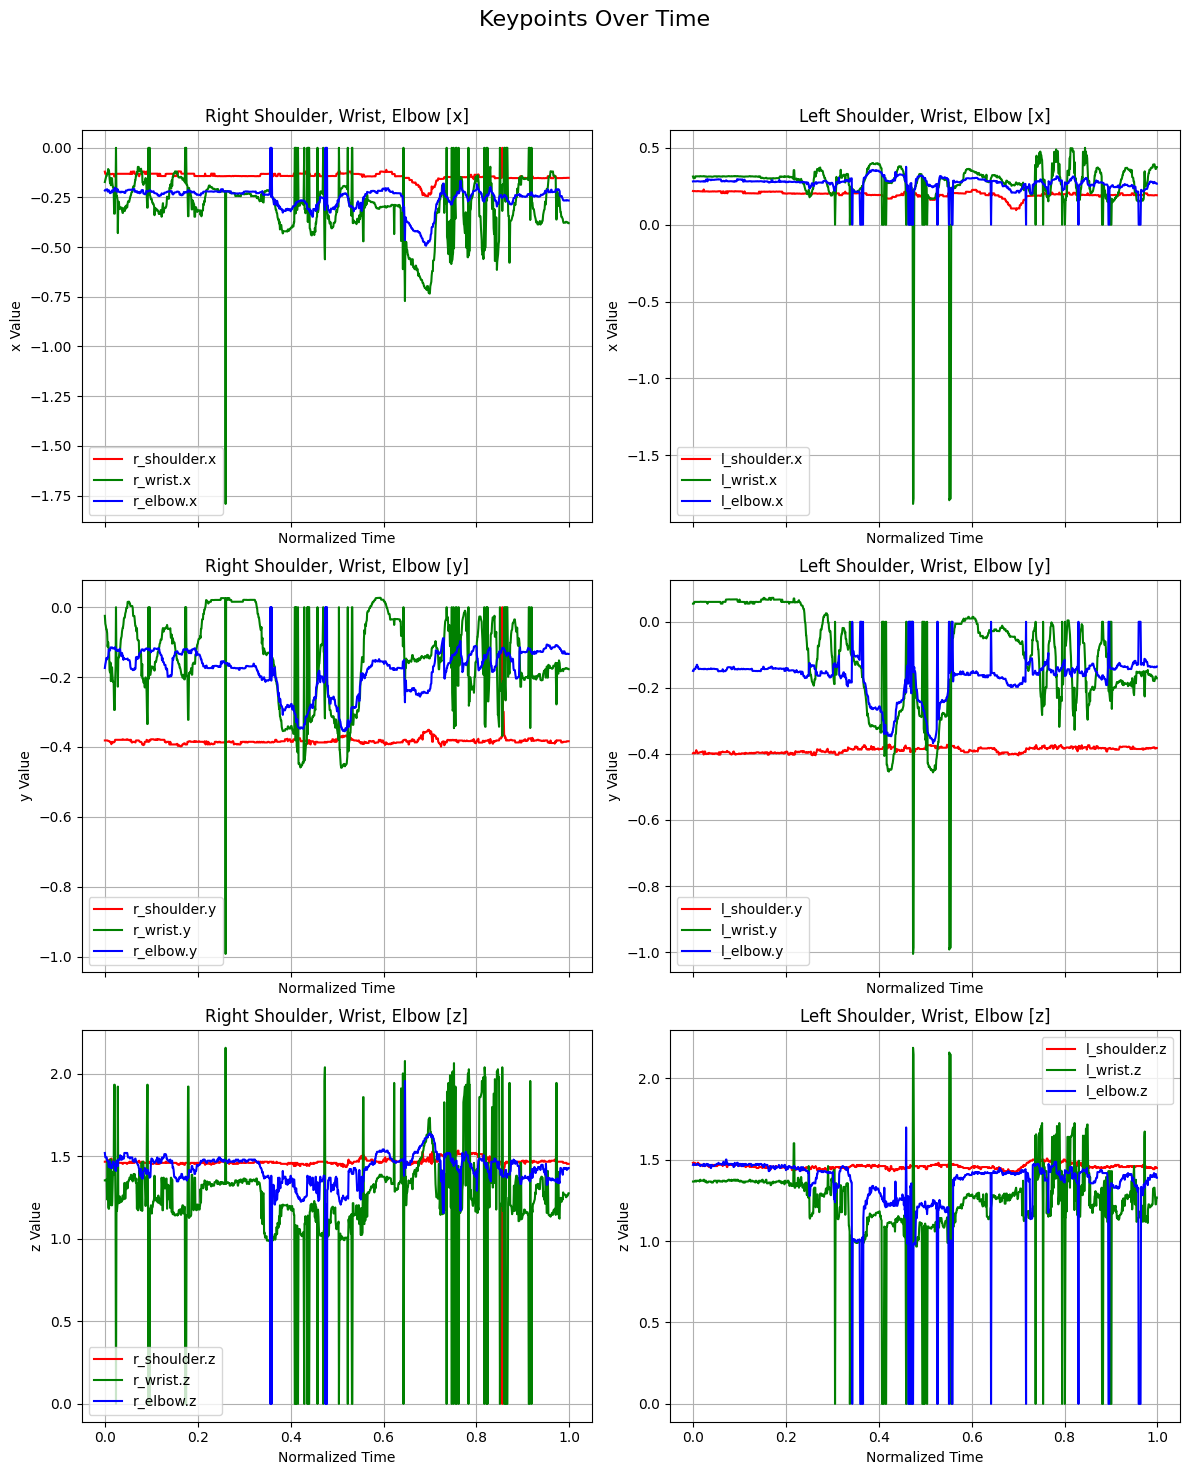

In [80]:
plot_keypoints_in_space(hpe3d_, 200, 1200)

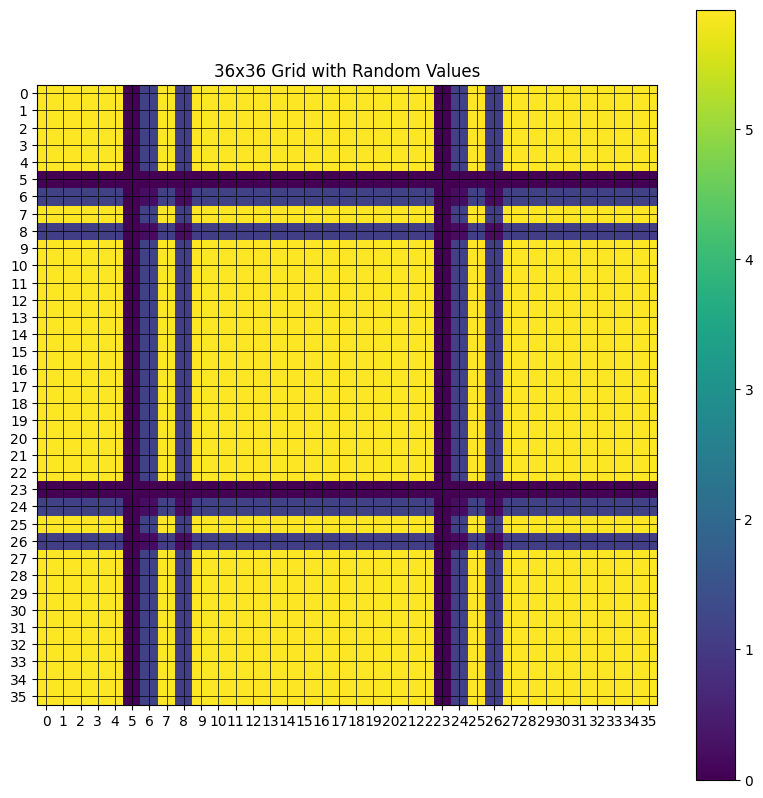

Playing with covariances. 

In [173]:
import numpy as np

def row_to_matrix(row):
    """
    Converts a single row of the dataframe into a 17x3 matrix (keypoints x, y, z).
    Assumes the row contains the coordinates for 17 keypoints in the format x, y, z for each keypoint.
    """
    # List of keypoints (in the order of x, y, z)
    keypoints = [
        'nose', 'l_eye', 'r_eye', 'l_ear', 'r_ear', 'neck', 
        'r_shoulder', 'l_shoulder', 'r_elbow', 'l_elbow', 
        'r_wrist', 'l_wrist', 'r_hip', 'l_hip', 'r_knee', 
        'l_knee', 'r_ankle', 'l_ankle'
    ]
    # Extract x, y, z for each keypoint
    keypoint_coords = []
    for keypoint in keypoints:
        x = row[f'{keypoint}.x']
        y = row[f'{keypoint}.y']
        z = row[f'{keypoint}.z']
        keypoint_coords.append([x, y, z])
    
    # Convert to a 17x3 numpy array
    keypoint_matrix = np.array(keypoint_coords)
    
    return keypoint_matrix

# Example usage: Convert each row of the dataframe
matrix_list = []
for idx, row in hpe3d_.iterrows():  # hpe3d_ is your dataframe
    keypoint_matrix = row_to_matrix(row)
    matrix_list.append(keypoint_matrix)

# Convert the list of matrices into a numpy array (optional, for final shape (N, 17, 3))
H = np.array(matrix_list)

cov_ = np.cov(keypoints_matrices[0, :, :], keypoints_matrices[1, :, :])
print(cov_.shape)
print(cov_)


# use numpy cov to find covariance between measurements

#print(H[1:5, 0, :])

covs_ = [] 
for i in range(0, H.shape[0]-1): 
    if i < H.shape[0]:
        covs_.append(np.cov(H[i, :, :], H[i + 1, :, :]))


#np.set_printoptions(threshold=np.inf)  # Ensures the entire matrix is printed
print(covs_[0])

import numpy as np
import matplotlib.pyplot as plt

# Generate a random 6x6 matrix with values between 1 and 10
matrix = np.random.randint(1, 11, size=(6, 6))

# Create a 36x36 grid (for simplicity, use the same random matrix as blocks)
grid = np.tile(matrix, (6, 6))

# Create a plot
plt.figure(figsize=(10, 10))
plt.imshow(covs_[-5], cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show the color scale

# Set gridlines and labels
plt.xticks(np.arange(0, 36, 1), labels=np.arange(0, 36))
plt.yticks(np.arange(0, 36, 1), labels=np.arange(0, 36))
plt.grid(True, which='both', color='black', linestyle='-', linewidth=0.5)

plt.title("36x36 Grid with Random Values")
plt.show()

Covariance Matrix:
 [[ 0.07704959 -0.00304649 -0.00377872]
 [-0.00304649  0.09009322 -0.00489433]
 [-0.00377872 -0.00489433  0.09441384]]


## TODO: 
- [ ] Convert 3D based on the TF 
- [ ] add Hand 3D and HPE 3D for easier command generation in future
- [ ] Filter by norm in the future :)